## Computer Book A: Comparing variables graphically

These series of codes, illustrate using python, the various exercises from the OU course M248 Analysing Data. The exercises were originally written to be carried out using Minitab statistical software but those exercises have been re-done in Python below

## Computer activty 16: Quality of tattoo removal for different depths and methods

Produce a side-by-side bar chart to display separately the results on quality of tattoo removal for the two surgical methods (methods being 'A' and 'B' but unknown)

A score of '1' represents poor removal whilst a score of '4' represents excellent removal.


Method  A  B
Score       
1       8  6
2       5  9
3       2  9
4       7  9


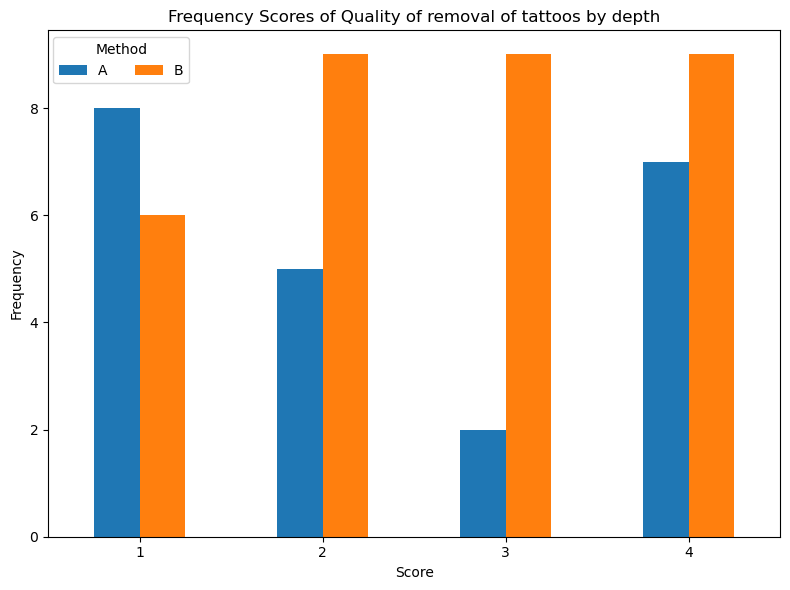

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#Load dara from csv
df = pd.read_csv(r'C:\Python\OU M248 Computer Activities using Python\Data files\tattoos.csv')
#print(df.head()) #return the first 5 rows of the dataframe

'''
Group the dataframe by Score and Depth, count the number of rows in each group using size() method
and then pivot into a new dataframe with with headings Score, deep and mod
'''
freq = df.groupby(["Score", "Method"]).size().unstack(fill_value=0)
print(freq.head())

# Plot grouped bar chart using new freq dataframe with score as the x-axis and 'deep' and 'mod' as bars
freq.plot(kind="bar", figsize=(8,6))

plt.title("Frequency Scores of Quality of removal of tattoos by depth")
plt.xlabel("Score")
plt.ylabel("Frequency")
#plt.legend(title="Depth")
# Relocate legend to top middle
plt.legend(title="Method", loc="upper center", bbox_to_anchor=(0.1, 1.00), ncol=2)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Commentary

Method 'B' seems to score fairly evenly across all four scores except slightly lower in score 1 i.e. it doesnt seem to be related to quality of tattoo removal. Whereas method 'A' seems to score just as excellent for quality of tattooremoval as it does for poor quality of tattoo removal but with mediocre score for quality of removal.

Overall method 'B' scores better than method 'A' on excellent and good removal quality and method 'A' scores worse than method 'B' for poor removal quality.

## Computer activty 17: A unit-area histogram of sports club membership

In this activity, you will create the unit-area histogram for sports club memebership (as opposed to a histogram of sports club memeberhsip completed in computer activity 8)

   Percentage
0        16.8
1        21.9
2        24.0
3        16.7
4        24.9


Text(0, 0.5, 'Frequency')

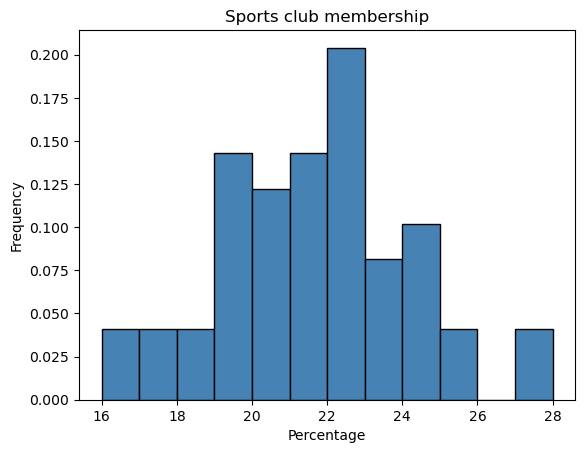

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#load data from csv
df = pd.read_csv(r'C:\Python\OU M248 Computer Activities using Python\Data files\membership.csv')

print(df.head()) #return the first 5 rows of the dataframe

# settings for printing the entire contents of dataframe
# pd.set_option('display.max_rows', None) # show all rows
# pd.set_option('display.max_columns', None) # show all columns

# Define cutpoints
cutpoints = [16,17,18,19,20,21,22,23,24,25,26,27,28]

'''
In order to plot the unit-area histogram of sports club membership requires changing the 
density=True
'''

# Plot histogram from Percentage column
plt.hist(df['Percentage'], bins=cutpoints, color='steelblue', edgecolor='black', density=True)

# Add labels and a title
plt.title('Sports club membership')
plt.xlabel('Percentage')
plt.ylabel('Frequency')

#### Commentary

This is a unit-area histogram of sports club membership of adults 16+ in England (of the same histogram made in activity 8). The unit-area hisotgram just ensures that the frequencies are scaled in such a way so that the total area of the bars equals to 1. A sort of standardisation method that allows for some comparison.

## Computer activity 18: A unit-area histogram of weight change

*Continuation of the analysis of weight change in clinical trials from computer activity 14*

1. Create a unit-area histogram of weight change for all the participants in the clinical trial. You should use the following cutpoints: −8, −7, −6, . . . , 3, 4.
2. Using the histogram, comment on the shape of the data. In particular, do the data appear to be unimodal, bimodal or multimodal?

Text(0, 0.5, 'Density')

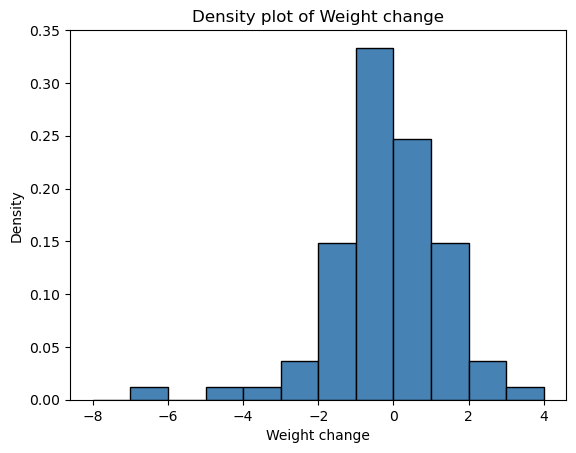

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from csv
df = pd.read_csv(r'C:\Python\OU M248 Computer Activities using Python\Data files\response-inhibition.csv')

#print(df.head()) #return the first 5 rows of the dataframe

# Define cutpoints
cutpoints = [-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4]

# Convert 'Weight change' column to numeric, coercing errors to NaN
df['Weight change'] = pd.to_numeric(df['Weight change'], errors='coerce')

# Plot histogram from Weight change column
plt.hist(df['Weight change'], bins=cutpoints, color='steelblue', edgecolor='black', density=True)

# Add labels and a title
plt.title('Density plot of Weight change')
plt.xlabel('Weight change')
plt.ylabel('Density')

#### Commentary

The unit-area histogram above is uni-modal with most participants showing 0 weight loss or gain. It looks like a normal distribution with equal weight gain and loss but could also be left skewed with a long tail to the left. There is one outlier of extreme weight-loss.

Note that the histogram includes both control and treatment group as well as both male and female

## Computer activity 19: Comparative boxplot of the weight change data

Recall that in Computer activity 14, you produced a boxplot of weight change in two weeks for all the participants in a weight-loss clinical trial, and that in Computer activity 15, you calculated numerical summaries forthese data for the treatment and control groups separately. In this activity, you are going to produce a comparative boxplot for these same data.

Obtain (horizontal) comparative boxplots for the data (Control vs. Treatment group)

   ID  Group  Gender        Weight change
0   1      1       1  -0.5999999999999943
1   2      1       1                    1
2   3      1       1  0.20000000000000284
3   4      0       1   0.7999999999999972
4   5      1       1  -1.8999999999999986


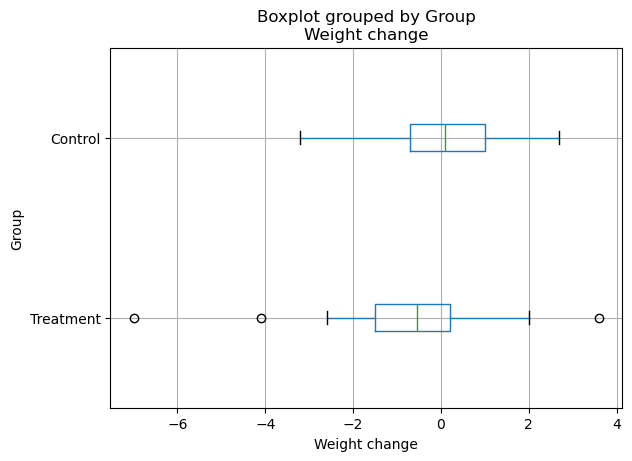

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from csv
df = pd.read_csv(r'C:\Python\OU M248 Computer Activities using Python\Data files\response-inhibition.csv')

# Return the first 5 rows of the dataframe
print(df.head())

# Convert 'Weight change' column to numeric, coercing errors to NaN
df['Weight change'] = pd.to_numeric(df['Weight change'], errors='coerce')

# Drop rows with NaN values in 'Weight change' column
# df = df.dropna(subset=['Weight change'])

# Ensure 'Group' column is treated as a category
df['Group'] = df['Group'].astype('category')

# Re-label the Group categories as 0 for control and 1 for treatment
df['Group'] = df['Group'].map({0: 'Control', 1: 'Treatment'})

# Explicitly set the order so 'Control' appears on top in the horizontal boxplot
df['Group'] = df['Group'].cat.reorder_categories(['Treatment', 'Control'], ordered=True)

# Create the boxplot
df.boxplot(column='Weight change', by='Group', vert=False),

plt.xlabel('Weight change')
plt.ylabel('Group')
plt.show()

#### Commentary

The boxplots for the Control group look symmetric (50% of the data lie within the box and the dividing line is the Median). However, the boxplot for the Treatment group look assymetric and it has some outliers at either side. 

Loss of weight is greater in the treatment group than in the control group and the treatment group had more weight loosers greater than 50% than in the control group. Whereas in the control group more than 50% of participants seemed to have gained weight.

## Computer activity 20: Comparative boxplot of memory recall data

In this worksheet (memory.csv), the two batches of data are in separate columns called Pleasant and Unpleasant (indicating what type of memory the subjects were trying to bring back). 

Obtain a comparative boxplot for the data.

Note: In a study of memory recall times, a series of stimulus words was shown to a subject on a computer screen. For each word, the subject was instructed to recall either a pleasant or an unpleasant memory associated with that word. Successful recall of a memory was indicated by the subject pressing a bar on a computer keyboard. Of key interest in this study was whether pleasant memories could be recalled more easily and quickly than unpleasant ones. 

   Pleasant  Unpleasant
0      1.07        1.45
1      1.17        1.67
2      1.22        1.90
3      1.42        2.02
4      1.63        2.32


Text(0.5, 1.0, 'Comparative Boxplots: Pleasant vs Unpleasant')

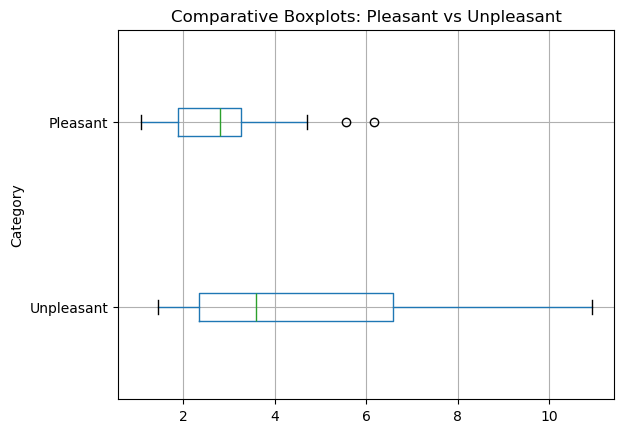

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from csv
df = pd.read_csv(r'C:\Python\OU M248 Computer Activities using Python\Data files\memory.csv')

# Return the first 5 rows of the dataframe
print(df.head())

# Plot each column as comparative boxplots
df.boxplot(column=['Unpleasant', 'Pleasant'], vert=False)

# Add labels and title
plt.ylabel('Category')
plt.title('Comparative Boxplots: Pleasant vs Unpleasant')


#### Commentary

As can be seen from the comparative boxplot the results of the study show that pleasant memories are quickly to recall than unpleasant ones as can be seen that overall the box positioning. The recall times for unpleasant memories are more spreadout (more variable) than for pleasant memories but also the unpleasant memory recal times are right-skewed. The plot for the pleasant memories are infact not left skewed but asymetric.

There does seem to be some outliers in the pleasant recall times which shows that not all pleasant memories automatically result in a fast recall time.

## Computer activity 21: More boxplots of the weight change data

In Computer activity 19, you produced a comparative boxplot of weight change in the treatment and control groups in the first two weeks of a clinical trial. In this activity, you will produce a comparative boxplot that also displays information on whether the weight change was different for the male and female participants.

Note: The treatment groups are 0 = Control and 1 = Treatment; the gender groups are 1 = Female, 2 = Male.

   ID  Group  Gender        Weight change
0   1      1       1  -0.5999999999999943
1   2      1       1                    1
2   3      1       1  0.20000000000000284
3   4      0       1   0.7999999999999972
4   5      1       1  -1.8999999999999986


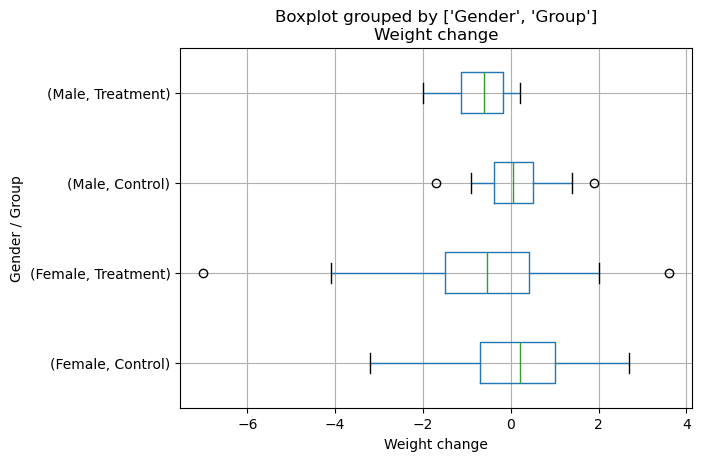

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from csv
df = pd.read_csv(r'C:\Python\OU M248 Computer Activities using Python\Data files\response-inhibition.csv')

# Return the first 5 rows of the dataframe
print(df.head())

# Convert 'Weight change' column to numeric, coercing errors to NaN
df['Weight change'] = pd.to_numeric(df['Weight change'], errors='coerce')

# Drop rows with NaN values in 'Weight change' column
# df = df.dropna(subset=['Weight change'])

# Ensure 'Group' column is treated as a category
df['Group'] = df['Group'].astype('category')
df['Gender'] = df['Gender'].astype('category')

# Re-label the Group categories as 'Control' for 0 and 'Treatment' for 1
df['Group'] = df['Group'].map({0: 'Control', 1: 'Treatment'})
df['Gender'] = df['Gender'].map({1: 'Female', 2: 'Male'})

# No need to reorder categories here, we'll let the boxplot handle grouping

# Create the boxplot
# Use both Gender and Group for grouping in the boxplot
df.boxplot(column='Weight change', by=['Gender', 'Group'], vert=False)

plt.xlabel('Weight change')
plt.ylabel('Gender / Group')
plt.show()

#### Commentary

It can be seen that when the responses are further split by gender that females show much more variability in weight change than do males as noted by the sizes of the boxes and the whiskers.

The location box i.e. the median (or the middle line of the box) appear to be the same for each group but are shifted after treatment e.g. the control group median for box sexes is near 0 whereas the treatment group median is between - 1 and 0.

## Computer activity 22: Relationship between field and laboratory pipeline defect depth measurements

The columns contain field and laboratory defect depth measurements for 107 defects in the Trans-Alaska oil pipeline. Obtain a scatterplot of the data with 'Field defect depth' on the y-axis and 'Laboratory defect depth' on the x-axis.

   Field defect depth  Laboratory defect depth
0                  18                     20.2
1                  38                     56.0
2                  15                     12.5
3                  20                     21.2
4                  18                     15.5


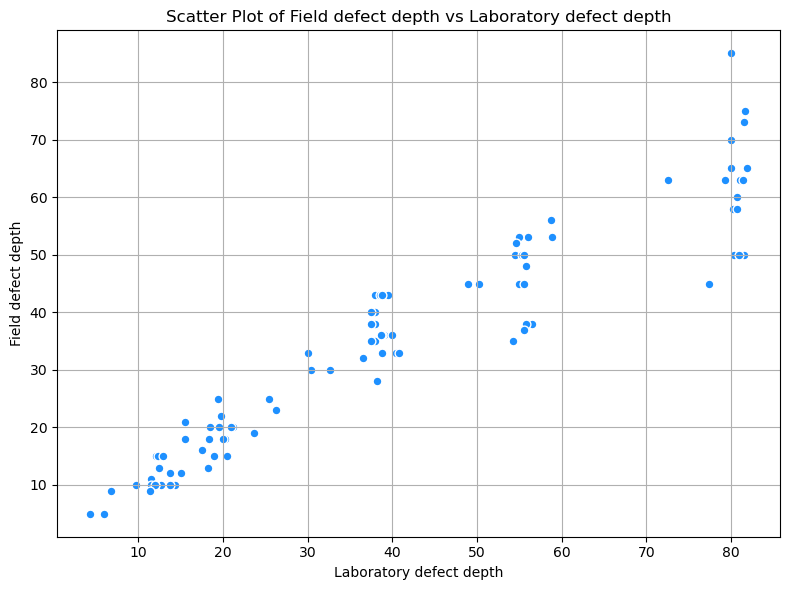

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from csv
df = pd.read_csv(r'C:\Python\OU M248 Computer Activities using Python\Data files\alaska.csv')

# Return the first 5 rows of the dataframe
print(df.head(5))

# Assign columns to X and Y variables
x_col = "Laboratory defect depth"
y_col = "Field defect depth"

# Plot the scatter
plt.figure(figsize=(8, 6))
plt.scatter(df[x_col], df[y_col], 
            c='dodgerblue',        # marker color
            alpha=1,       # transparency
            edgecolor='w',   # marker border color
            s=40)            # marker size

# Label the axis and title
plt.title(f'Scatter Plot of {y_col} vs {x_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Commentary

There seems to be a strong correlation between 